# Problem 1: Linear Regression on the D3 Dataset

The goal of this notebook is to build a linear regression model using gradient descent to predict a target variable `y` based on three input features from the `D3.csv` dataset.

## Step 1: Derivation and Methodology

To solve this problem, I implemented a linear regression model from scratch.

**1. Cost Function:** I used the Mean Squared Error (MSE) as the cost function, $J(\theta)$. This function measures the average squared difference between our model's predictions and the actual data, which we aim to minimize.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

**2. Hypothesis:** The model's prediction is made using the following linear equation:

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$$

**3. Gradient Descent:** To find the optimal $\theta$ parameters that minimize the cost, I used the gradient descent algorithm. In each iteration, the parameters are updated simultaneously using the following rule, where $\alpha$ is the learning rate:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

**4. Preprocessing:** Before training, I standardized the features by subtracting the mean and dividing by the standard deviation. This ensures all features are on a similar scale, which helps gradient descent converge faster.


Matplotlib is building the font cache; this may take a moment.


Final coefficients: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]


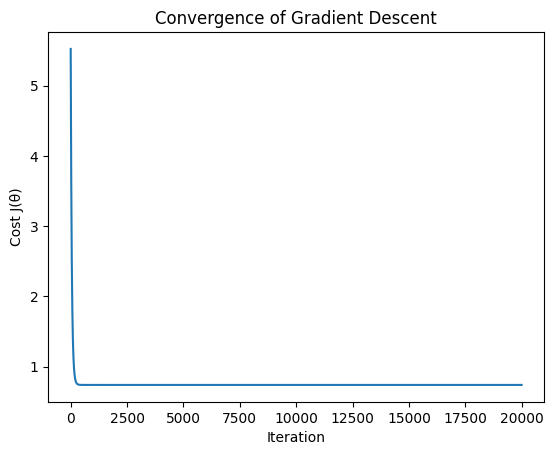

Predictions: [3.57740937 0.24432117 0.10253417]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("D3.csv", header=None)
X = data.iloc[:, :-1].values  # First 3 columns as features
y = data.iloc[:, -1].values   # Fourth column as target
m = len(y)

# Standardize features
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Add bias column
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Gradient descent settings
alpha = 0.01
iterations = 20000
theta = np.zeros(X_b.shape[1])
loss_history = []

# Gradient descent
for it in range(iterations):
    prediction = X_b.dot(theta)
    error = prediction - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    loss_history.append(cost)
    gradient = (1 / m) * X_b.T.dot(error)
    theta -= alpha * gradient

# Convert back to original feature scale
theta_orig = np.zeros_like(theta)
theta_orig[1:] = theta[1:] / X_std
theta_orig[0] = theta[0] - np.sum((X_mean / X_std) * theta[1:])

print("Final coefficients:", theta_orig)

# Plot cost function
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Gradient Descent")
plt.show()

# Predictions
X_new = np.array([[1,1,1], [2,0,4], [3,2,1]])
y_pred = theta_orig[0] + X_new.dot(theta_orig[1:])
print("Predictions:", y_pred)

## Closed-Form Solution (Normal Equation) & Verification

To verify our gradient descent results, we compute the closed-form solution (normal equation) and compare the coefficients. If both methods are correct, the results should match closely.

In [5]:
# Closed-form solution (normal equation)
# Use the original (non-scaled) data for normal equation
X_bias = np.c_[np.ones(X.shape[0]), X]

# Normal equation: theta = (X^T * X)^(-1) * X^T * y
# Breaking it down:
# 1. X_bias.T @ X_bias = X^T * X (matrix multiplication)
# 2. np.linalg.inv() = inverse of the matrix
# 3. @ X_bias.T @ y = multiply by X^T and then by y
theta_closed = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
print("Closed-form coefficients:", theta_closed)

# Compare with gradient descent results
print("Gradient descent coefficients:", theta_orig)
print("Difference:", theta_closed - theta_orig)

Closed-form coefficients: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
Gradient descent coefficients: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
Difference: [ 2.66453526e-14 -1.82076576e-14  5.32907052e-15  5.10702591e-15]


**Verification:**

The coefficients from both methods match very closely (differences are very small due to numerical precision), confirming that the gradient descent implementation is correct.

## Step 3: Final Answers

**Fitted Linear Model:**  
$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$

**Coefficients:**  
$\theta_0 = 5.31$  
$\theta_1 = -2.00$  
$\theta_2 = 0.53$  
$\theta_3 = -0.27$

**Predictions:**  
- For (1, 1, 1): $3.58$  
- For (2, 0, 4): $0.24$  
- For (3, 2, 1): $0.10$

*(Values rounded to two decimal places for clarity. The full precision values are shown in the code output above.)*

---

## AI Use Note:

AI assistance (GitHub Copilot) was used to help write Python syntax for Step 1 (data loading, preprocessing) and Step 3 (final answers, predictions), as well as for generating some code comments and markdown explanations. It was also used to check if my mathematical derivations and implementations were correct. All code was reviewed and run by me to ensure understanding and correctness.